<a href="https://colab.research.google.com/github/ljs7463/study-repository/blob/master/Data%20analysis%20practice/Visualization/based_on_subplots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# matplotlib 버전 upgrade
!pip install matplotlib -U
import matplotlib as mpl
mpl.__version__

Requirement already up-to-date: matplotlib in /usr/local/lib/python3.7/dist-packages (3.4.2)


'3.4.2'

In [2]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# 한글 사용
plt.rc('font', family='NanumBarunGothic') 

In [39]:
# 월평균 주가

# 월
m2020 = ['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12']

# 삼성전자 월평균 주가
sec = [58842, 58988, 50357, 49086, 49086, 52968, 54828, 57170, 58176, 59787, 63255, 73343]

# 카카오 월평균 주가
kakao = [32640, 35182, 31920, 33615, 45613, 52834, 64459, 74602, 75905, 71392, 72355, 75260]

# LG전자 월평균 주가
lge = [68860, 65820, 52949, 52748, 56216, 65089, 70857, 84090, 89524, 90789, 87202, 99738]

# 현대자동차 월평균 주가
hdm = [119700, 128012,  91800,  93258,  94808, 103291, 111326, 158588, 176226, 173697, 176762, 189095]

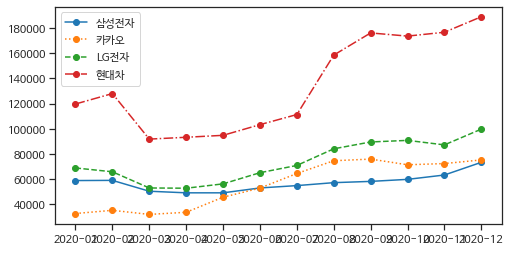

In [40]:
fig, ax = plt.subplots(figsize = (8, 4))

ax.plot(m2020, sec, "o-",label = '삼성전자')
ax.plot(m2020, kakao, "o:", label="카카오")
ax.plot(m2020, lge, "o--", label="LG전자")
ax.plot(m2020, hdm, "o-.", label="현대차")
ax.legend()

In [41]:
# 수익률 비교
# 월별 평균 주가 연초 시초가로 나눔
# 넘파이를 사용하는 이유는 한번에 계산이 되기 때문
# -1하면 0이되기때문에 맨처음을 0으로 했을때 얼만큼올랐고 내렸는지 확인가능
# 우리가 알고 싶은것은 등락이므로 시작을0으로 기존 가격에 상관없이 순수 등락을 표시가능함(시각화에서 알고싶은것에 집중하기!!!)

sec_rate = np.array(sec)/sec[0] - 1 
kakao_rate = np.array(kakao)/kakao[0] - 1
lge_rate = np.array(lge)/lge[0] - 1
hdm_rate = np.array(hdm)/hdm[0] - 1

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


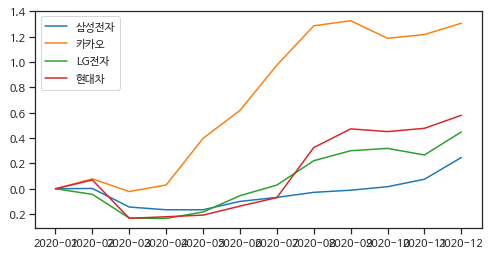

In [42]:
# 월별 평균 주가를 연초 시초가로 나눈후 -1을 통해 0을기준으로 변화량을 나타냄
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(m2020, sec_rate, label="삼성전자")
ax.plot(m2020, kakao_rate, label="카카오")
ax.plot(m2020, lge_rate, label="LG전자")
ax.plot(m2020, hdm_rate, label="현대차")
ax.legend()

(-0.5, 1.5)

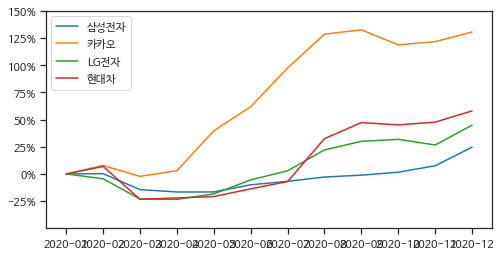

In [43]:
# 4. y축 눈금 정비, - 사라짐 문제 해결

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(m2020, sec_rate, label="삼성전자")
ax.plot(m2020, kakao_rate, label="카카오")
ax.plot(m2020, lge_rate, label="LG전자")
ax.plot(m2020, hdm_rate, label="현대차")
ax.legend()

yticks = np.arange(-0.25, 1.75, 0.25)
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y*100:.0f}%" for y in yticks])
ax.set_ylim(-0.5, )

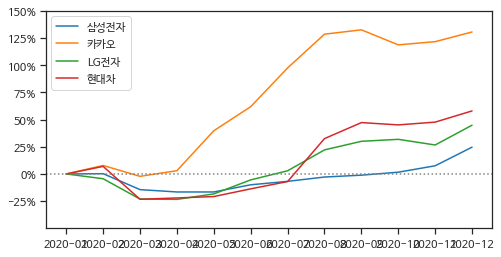

In [44]:
# 5. 손익이 잘 드러나게 변경

ax.axhline(y=0, c="gray", ls=":") # ls= linestyle
display(fig)#(쥬피터나 코렙 화면에 그림을 띄우는 명령어)

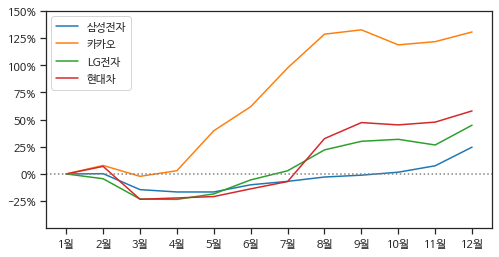

In [45]:
# 6. 가로축을 깔끔하게 변경

xticklabels = [f"{i}월" for i in range(1, 13)]
ax.set_xticks(range(0, 12))
ax.set_xticklabels(xticklabels)
display(fig)

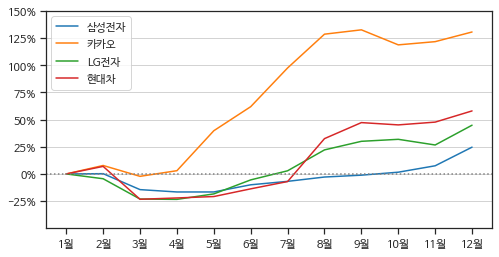

In [46]:
# 7. y축 grid 추가

ax.grid(axis="y", c="lightgray") # "axis = 'x'" 는 x축 세로선 grid생성
display(fig)

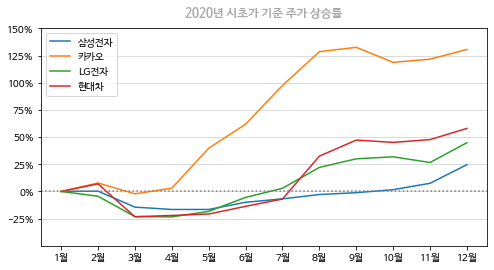

In [12]:
# 8. title 추가

ax.set_title("2020년 시초가 기준 주가 상승률", 
             fontweight="bold", fontsize="large", color="darkgray", pad=12)# pad는 타이틀과 그림사이의 거리
display(fig)

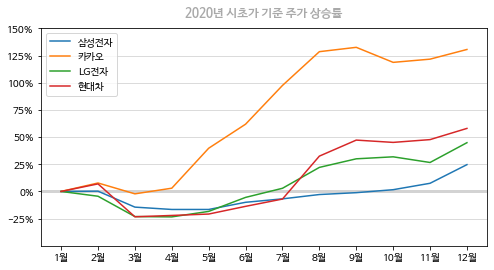

In [13]:
# 전체 코드 정리

fig, ax = plt.subplots(figsize=(8, 4)) # 객체지향 방식 적용

ax.plot(m2020, sec_rate, label="삼성전자")  # line plot
ax.plot(m2020, kakao_rate, label="카카오")
ax.plot(m2020, lge_rate, label="LG전자")
ax.plot(m2020, hdm_rate, label="현대차")

xticks = [f"{i}월" for i in range(1, 13)] # x축 눈금
ax.set_xticks(list(range(12)))
ax.set_xticklabels(xticks)

yticks = np.arange(-0.25, 1.75, 0.25)  # y축 눈금
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y*100:.0f}%" for y in yticks])
ax.set_ylim(-0.5, )

ax.grid(axis="y", c="lightgray") # 배경 눈금
ax.axhline(y=0, c="lightgray", lw=3, zorder=0)  # 주가 상승, 하락 기준점 *
#lw = linewidth, zorder은 포토샵에서 레이어같은느낌 1이 맨앞
ax.set_title("2020년 시초가 기준 주가 상승률",  # title
             fontweight="bold", fontsize="large", color="darkgray", pad=12)

ax.legend()

In [14]:
# 기업 색상 (RGB)

sec_c = np.array([52, 117, 162])/255   # np.array([12, 77, 162])/255
kakao_c = np.array([230, 207, 1])/255  # np.array([250, 227, 1])/255
lge_c = np.array([203, 10, 55])/255
hdm_c = np.array([1, 44, 95])/255

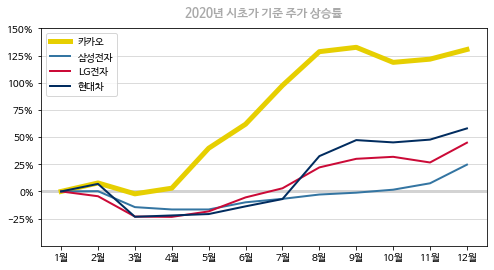

In [15]:
# 카카오 강조

fig, ax = plt.subplots(figsize=(8, 4)) # 객체지향 방식 적용

ax.plot(m2020, kakao_rate, c=kakao_c, lw=5, label="카카오")  # line plot *
ax.plot(m2020, sec_rate, c=sec_c, lw=2, label="삼성전자")
ax.plot(m2020, lge_rate, c=lge_c, lw=2, label="LG전자")
ax.plot(m2020, hdm_rate, c=hdm_c, lw=2, label="현대차")

xticks = [f"{i}월" for i in range(1, 13)] # x축 눈금
ax.set_xticks(list(range(12)))
ax.set_xticklabels(xticks)

yticks = np.arange(-0.25, 1.75, 0.25)  # y축 눈금
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y*100:.0f}%" for y in yticks])
ax.set_ylim(-0.5, )

ax.grid(axis="y", c="lightgray") # 배경 눈금
ax.axhline(y=0, c="lightgray", lw=3, zorder=0)  # 주가 상승, 하락 기준점

ax.set_title("2020년 시초가 기준 주가 상승률",  # title
             fontweight="bold", fontsize="large", color="darkgray", pad=12)

ax.legend()

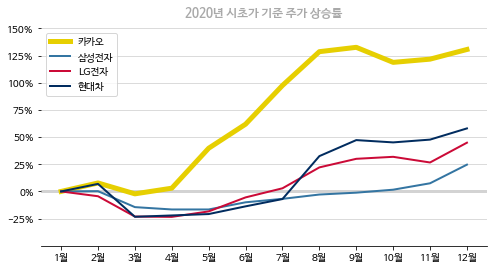

In [16]:
# 불필요한 테두리 지우기

fig, ax = plt.subplots(figsize=(8, 4)) # 객체지향 방식 적용

ax.plot(m2020, kakao_rate, c=kakao_c, lw=5, label="카카오")  # line plot
ax.plot(m2020, sec_rate, c=sec_c, lw=2, label="삼성전자")
ax.plot(m2020, lge_rate, c=lge_c, lw=2, label="LG전자")
ax.plot(m2020, hdm_rate, c=hdm_c, lw=2, label="현대차")

xticks = [f"{i}월" for i in range(1, 13)] # x축 눈금
ax.set_xticks(list(range(12)))
ax.set_xticklabels(xticks)

yticks = np.arange(-0.25, 1.75, 0.25)  # y축 눈금
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y*100:.0f}%" for y in yticks])
ax.set_ylim(-0.5, )

ax.grid(axis="y", c="lightgray") # 배경 눈금
ax.axhline(y=0, c="lightgray", lw=3, zorder=0)  # 주가 상승, 하락 기준점

ax.spines[["left", "top", "right"]].set_visible(False)  # 테두리 지우기 *

ax.set_title("2020년 시초가 기준 주가 상승률",  # title
             fontweight="bold", fontsize="large", color="darkgray", pad=12)

ax.legend()

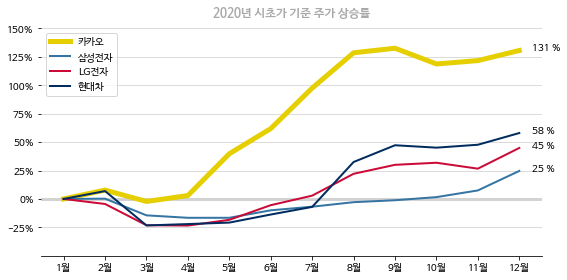

In [17]:
# 상승률 숫자 달기

fig, ax = plt.subplots(figsize=(8, 4)) # 객체지향 방식 적용

ax.plot(m2020, kakao_rate, c=kakao_c, lw=5, label="카카오")  # line plot
ax.plot(m2020, sec_rate, c=sec_c, lw=2, label="삼성전자")
ax.plot(m2020, lge_rate, c=lge_c, lw=2, label="LG전자")
ax.plot(m2020, hdm_rate, c=hdm_c, lw=2, label="현대차")

# 상승률 *
for r in [kakao_rate[-1], sec_rate[-1], lge_rate[-1], hdm_rate[-1]]:
    ax.text(11.3, r, f"{r*100:.0f} %")


xticks = [f"{i}월" for i in range(1, 13)] # x축 눈금
ax.set_xticks(list(range(12)))
ax.set_xticklabels(xticks)

yticks = np.arange(-0.25, 1.75, 0.25)  # y축 눈금
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y*100:.0f}%" for y in yticks])
ax.set_ylim(-0.5, )

ax.grid(axis="y", c="lightgray") # 배경 눈금
ax.axhline(y=0, c="lightgray", lw=3, zorder=0)  # 주가 상승, 하락 기준점

ax.spines[["left", "top", "right"]].set_visible(False)

ax.set_title("2020년 시초가 기준 주가 상승률",  # title
             fontweight="bold", fontsize="large", color="darkgray", pad=12)

ax.legend()

fig.tight_layout()

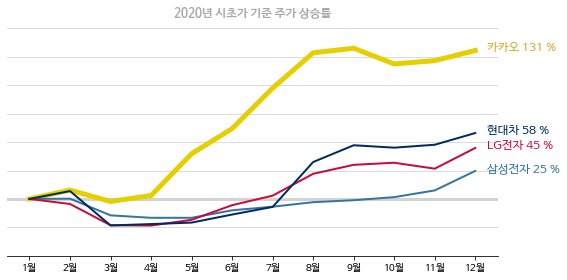

In [18]:
# legend 떼고 회사 색상 입히기, y축 눈금 제거하기

fig, ax = plt.subplots(figsize=(8, 4)) # 객체지향 방식 적용

ax.plot(m2020, kakao_rate, c=kakao_c, lw=5, label="카카오")  # line plot
ax.plot(m2020, sec_rate, c=sec_c, lw=2, label="삼성전자")
ax.plot(m2020, lge_rate, c=lge_c, lw=2, label="LG전자")
ax.plot(m2020, hdm_rate, c=hdm_c, lw=2, label="현대차")

# 회사 이름 + 상승률 * 
rates = [kakao_rate[-1], sec_rate[-1], lge_rate[-1], hdm_rate[-1]]
companies = ["카카오", "삼성전자", "LG전자", "현대차"]
colors = ["goldenrod", sec_c, lge_c, hdm_c]
for r, co, c in zip(rates, companies, colors):
    ax.text(11.3, r, f"{co} {r*100:.0f} %", color=c, fontsize=12)


xticks = [f"{i}월" for i in range(1, 13)] # x축 눈금
ax.set_xticks(list(range(12)))
ax.set_xticklabels(xticks)

yticks = np.arange(-0.25, 1.75, 0.25)  # y축 눈금
ax.set_yticks(yticks)
ax.set_yticklabels([])
ax.set_ylim(-0.5, )
ax.tick_params(axis="y", length=0) # y축 눈금 지우기

ax.grid(axis="y", c="lightgray") # 배경 눈금
ax.axhline(y=0, c="lightgray", lw=3, zorder=0)  # 주가 상승, 하락 기준점

ax.spines[["left", "top", "right"]].set_visible(False)

ax.set_title("2020년 시초가 기준 주가 상승률",  # title
             fontweight="bold", fontsize="large", color="darkgray", pad=12)

# ax.legend()
fig.tight_layout()

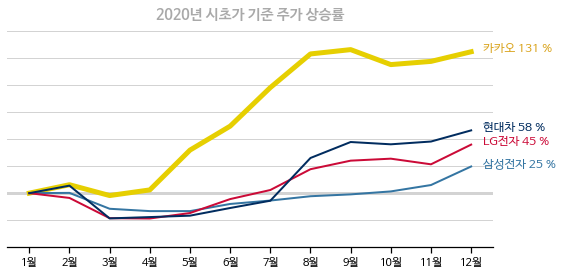

In [19]:
# context 설정
sns.set_context("notebook")

fig, ax = plt.subplots(figsize=(8, 4)) # 객체지향 방식 적용

ax.plot(m2020, kakao_rate, c=kakao_c, lw=5, label="카카오")  # line plot
ax.plot(m2020, sec_rate, c=sec_c, lw=2, label="삼성전자")
ax.plot(m2020, lge_rate, c=lge_c, lw=2, label="LG전자")
ax.plot(m2020, hdm_rate, c=hdm_c, lw=2, label="현대차")

# 상승률
rates = [kakao_rate[-1], sec_rate[-1], lge_rate[-1], hdm_rate[-1]]
companies = ["카카오", "삼성전자", "LG전자", "현대차"]
colors = ["goldenrod", sec_c, lge_c, hdm_c]
for r, co, c in zip(rates, companies, colors):
    ax.text(11.3, r, f"{co} {r*100:.0f} %", color=c, fontsize=12)


xticks = [f"{i}월" for i in range(1, 13)] # x축 눈금
ax.set_xticks(list(range(12)))
ax.set_xticklabels(xticks)

yticks = np.arange(-0.25, 1.75, 0.25)  # y축 눈금
ax.set_yticks(yticks)
ax.set_yticklabels([])
ax.set_ylim(-0.5, )
ax.tick_params(axis="y", length=0) # y축 눈금 지우기

ax.grid(axis="y", c="lightgray") # 배경 눈금
ax.axhline(y=0, c="lightgray", lw=3, zorder=0)  # 주가 상승, 하락 기준점

ax.spines[["left", "top", "right"]].set_visible(False)

ax.set_title("2020년 시초가 기준 주가 상승률",  # title
             fontweight="bold", fontsize="large", color="darkgray", pad=12)

# ax.legend()
fig.tight_layout()

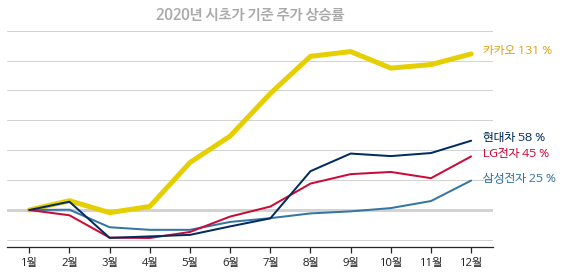

In [20]:
# style 설정
sns.set_style("ticks")
plt.rc('font', family='NanumBarunGothic') 

fig, ax = plt.subplots(figsize=(8, 4)) # 객체지향 방식 적용

ax.plot(m2020, kakao_rate, c=kakao_c, lw=5, label="카카오")  # line plot
ax.plot(m2020, sec_rate, c=sec_c, lw=2, label="삼성전자")
ax.plot(m2020, lge_rate, c=lge_c, lw=2, label="LG전자")
ax.plot(m2020, hdm_rate, c=hdm_c, lw=2, label="현대차")

# 상승률
rates = [kakao_rate[-1], sec_rate[-1], lge_rate[-1], hdm_rate[-1]]
companies = ["카카오", "삼성전자", "LG전자", "현대차"]
colors = ["goldenrod", sec_c, lge_c, hdm_c]
for r, co, c in zip(rates, companies, colors):
    ax.text(11.3, r, f"{co} {r*100:.0f} %", color=c, fontsize=12)


xticks = [f"{i}월" for i in range(1, 13)] # x축 눈금
ax.set_xticks(list(range(12)))
ax.set_xticklabels(xticks)

yticks = np.arange(-0.25, 1.75, 0.25)  # y축 눈금
ax.set_yticks(yticks)
ax.set_yticklabels([])
ax.tick_params(axis="y", length=0)

ax.grid(axis="y", c="lightgray") # 배경 눈금
ax.axhline(y=0, c="lightgray", lw=3, zorder=0)  # 주가 상승, 하락 기준점

ax.spines[["left", "top", "right"]].set_visible(False)

ax.set_title("2020년 시초가 기준 주가 상승률",  # title
             fontweight="bold", fontsize="large", color="darkgray", pad=12)

# ax.legend()
fig.tight_layout()

In [21]:
### Appendix. 주가 데이터 가져오기

import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [22]:
# https://jjeongil.tistory.com/656

# file_name 다운로드한 주가 데이터를 저장할 파일 이름
# company_code 종목 코드
# year1/month1/date1 데이터를 다운로드할 시작일
# year2/month2/date2 데이터를 다운로드할 마감일
def download_stock_data(file_name, company_code, year1, month1, date1, year2, month2, date2):
    start = datetime.datetime(year1, month1, date1)
    end = datetime.datetime(year2, month2, date2)
    df = web.DataReader("%s.KS" % (company_code), "yahoo", start, end)
    df.to_pickle(file_name)
    return df


def load_stock_data(file_name):
    df = pd.read_pickle(file_name)
    return df


download_stock_data('sec.data', '005930', 2016, 1, 1, 2020, 12, 31)
df_sec = load_stock_data('sec.data')

download_stock_data('lge.data', '066570', 2016, 1, 1, 2020, 12, 31)
df_lge = load_stock_data('lge.data')

download_stock_data('kakao.data', '035720', 2016, 1, 1, 2020, 12, 31)
df_kakao = load_stock_data('kakao.data')

download_stock_data('hdm.data', '005380', 2016, 1, 1, 2020, 12, 31)
df_hdm = load_stock_data('hdm.data')

In [23]:
df_kakao

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,23500.0,23060.0,23500.0,23060.0,1488435.0,22928.773438
2016-01-05,23500.0,22760.0,22820.0,23420.0,1590180.0,23286.726562
2016-01-06,24220.0,23460.0,23600.0,23820.0,2720685.0,23684.451172
2016-01-07,24100.0,23320.0,23680.0,23460.0,1710970.0,23326.500000
2016-01-08,23180.0,22740.0,23060.0,23040.0,2000230.0,22908.888672
...,...,...,...,...,...,...
2020-12-23,77100.0,75400.0,76200.0,75500.0,3149760.0,75469.640625
2020-12-24,76000.0,74400.0,75700.0,74800.0,2325660.0,74769.921875
2020-12-28,75400.0,73900.0,74900.0,74600.0,3232320.0,74570.000000


In [24]:
# open 시가
# high 고가
# low 저가
# close 종가
# volume 거래량
# Adj Close 주식의 분할, 배당, 배분 등을 고려해 조정한 종가

In [25]:
def calc_mavg(df):
    df = df.reset_index()
    df["y_m"] = df["Date"].dt.to_period("M")
    df["avg"] = df[["Open", "Close"]].mean(axis=1)
    return np.round(df.groupby("y_m").mean()["avg"].values, 0).astype(int)

sec_2020 = calc_mavg(df_sec)
kakao_2020 = calc_mavg(df_kakao)
lge_2020 = calc_mavg(df_lge)
hdm_2020 = calc_mavg(df_hdm)

In [26]:
sec_2020

array([23140, 23312, 25087, 25680, 25552, 28055, 29883, 31866, 31607,
       32045, 32445, 35461, 37413, 38574, 41028, 41934, 45571, 46518,
       49364, 46977, 50118, 53979, 55518, 50762, 50021, 47331, 49648,
       50091, 51255, 48449, 46270, 45856, 46071, 43607, 43379, 39820,
       41508, 46340, 44551, 46075, 43074, 44764, 46246, 43856, 47192,
       49907, 52232, 53501, 58842, 58988, 50357, 49086, 49086, 52968,
       54828, 57170, 58176, 59787, 63255, 73343])